# Arabic Handwritten Characters Dataset


#### In this work, we model a deep learning architecture that can be effectively apply to recognizing Arabic handwritten characters. We are going to Apply Knn algoruthm on our data and train it by 3 methods: Regression  tree, Multi perception layer MLP and Convolutional Neural Network CNN.

#### The data-set is composed of 16,800 characters written by 60 participants, the age range is between 19 to 40 years, and 90% of participants are right-hand.The database is partitioned into two sets: a training set (13,440 characters to 480 images per class) and a test set (3,360 characters to 120 images per class).

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import keras
from sklearn.metrics import mean_squared_error, r2_score
## Regression Library
from sklearn.tree import DecisionTreeRegressor
## Classificaton Library
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn import model_selection

Using TensorFlow backend.


## Reading data

In [2]:
train_data = pd.read_csv('csvTrainImages 13440x1024.csv', header = None)
train_label = pd.read_csv('csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('csvTestImages 3360x1024.csv', header = None)
test_label = pd.read_csv('csvTestLabel 3360x1.csv', header = None)

In [3]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,...,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000,13440.000000
mean,0.121577,0.021354,0.009747,0.011310,0.019048,0.005357,0.005060,0.020908,0.033333,0.042708,...,0.302455,0.221131,0.240774,0.295089,0.373512,0.355060,0.293080,0.242113,0.306176,0.931027
std,2.832336,0.956019,0.699926,0.826053,2.199600,0.621059,0.552589,1.438708,2.336252,2.397563,...,6.420500,4.900565,5.456679,5.841086,7.395038,7.146192,5.845676,4.902063,5.348576,8.753527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,128.000000,81.000000,59.000000,87.000000,255.000000,72.000000,64.000000,151.000000,236.000000,172.000000,...,255.000000,247.000000,255.000000,251.000000,255.000000,255.000000,244.000000,241.000000,224.000000,255.000000


In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_label.head(10)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,2
9,2


## Casting data to the same type


In [6]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

## Display some images

In [7]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)
    
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = int(x.shape[0]/4)
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])    

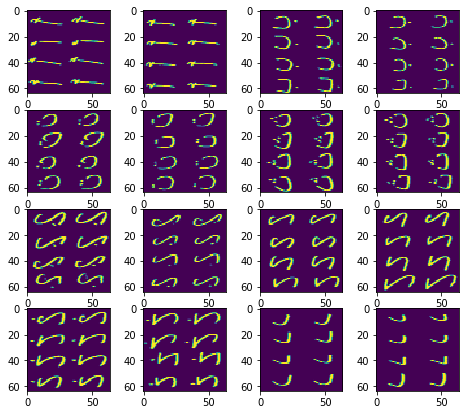

In [8]:
display_image(train_data, 64,16)
plt.show()

#### We notice that each of the eight letters differs from a person to an other like in the letter "Dal د" in the bottom right , we see difference can occure in the angle of the letter or in the placing of the dot , as we will prove later.¶


## Normalizing Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

## Applying k-nearest neighbors algorithm (Comparing Error Rate with the K Value 1-10


C:\Users\JOEY\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\JOEY\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\JOEY\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\JOEY\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
C:\Users\JOEY\Anaconda3\lib\site-packages\ipykernel_laun

Text(0, 0.5, 'Mean Error')

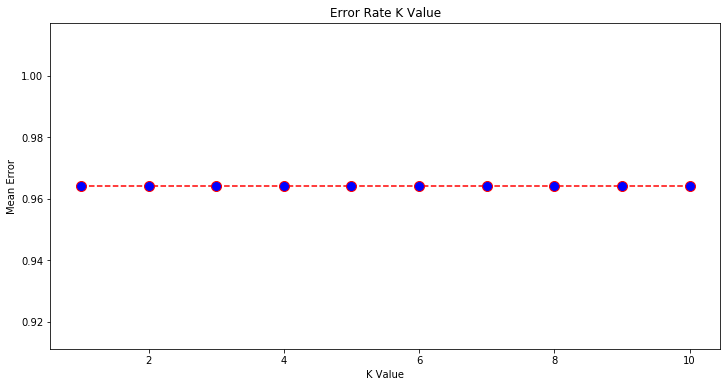

In [14]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data, train_label)
    pred_i = knn.predict(test_data)
    error.append(np.mean(pred_i != test_label))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### It seems that applying k-nn algorithm with values ranging from 1 to 10 gives us the same error rate (between 0.96 and 0.98) and this is good result since the best error rate is 1

## Training the model using Regression Tree 

In [10]:
Tree_reg=DecisionTreeRegressor()
reg_Tree_Class= Tree_reg.fit(train_data,train_label)


## Predictions and Evaluation

In [11]:
TrainLabel_pred= reg_Tree_Class.predict(test_data)
print("Regression Tree vailidation: {}%".format(reg_Tree_Class.score(test_data,test_label)*100))

print("Mean squared error: %.2f" % mean_squared_error(test_label, TrainLabel_pred))

print('Variance score: %.2f' % r2_score(test_label, TrainLabel_pred)) 

Regression Tree vailidation: -14.226418536763363%
Mean squared error: 74.53
Variance score: -0.14


#### Training using Regression Tree gives us prediction with -14% accuracy

## Training the model using MLP

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16),max_iter=500)
mlp.fit(train_data,train_label)

C:\Users\JOEY\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 16, 16), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Predictions and Evaluation

In [13]:
from sklearn.metrics import classification_report
predict_test = mlp.predict(test_data)
print(classification_report(test_label,predict_test))


              precision    recall  f1-score   support

           0       0.79      0.80      0.79       120
           1       0.63      0.66      0.64       120
           2       0.46      0.38      0.42       120
           3       0.46      0.44      0.45       120
           4       0.35      0.31      0.33       120
           5       0.38      0.35      0.36       120
           6       0.34      0.33      0.33       120
           7       0.52      0.54      0.53       120
           8       0.51      0.49      0.50       120
           9       0.66      0.61      0.63       120
          10       0.57      0.64      0.61       120
          11       0.43      0.48      0.45       120
          12       0.38      0.36      0.37       120
          13       0.52      0.47      0.50       120
          14       0.39      0.38      0.38       120
          15       0.48      0.42      0.45       120
          16       0.44      0.43      0.44       120
          17       0.32    

#### Training using MLP gives us prediction with 48% accuracy

## Training the model using CNN

#### Since labels are recorded as integers, we need to encode them as categories , as in the following line


In [15]:
labelencoder_X = LabelEncoder()
train_label = labelencoder_X.fit_transform(train_label)

C:\Users\JOEY\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
train_data.shape

(13440, 1024)

#### So we need to reshape it to demonstrate the 32*32 pixels shape of each image



In [17]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [18]:
train_data.shape
       

(13440, 32, 32, 1)

#### We make labels as categories

In [19]:
train_label =keras.utils.np_utils.to_categorical(train_label,28)

test_label =keras.utils.np_utils.to_categorical(test_label,28)

train_label_data = pd.DataFrame(train_label)

#### We check the structure of label data

In [20]:
train_label_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
 print(train_label_data[train_label_data[0]==1].count())

0     480
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
dtype: int64


#### So we have each of the 28 letters written for 480 times in training data so we have (480*28=13440) training case

## Data preprocessing


#### We need to rescale data pixels from 1 to zero as preferred for processing in convolutional neural networks¶


#### Also we need to add some rotation since in the real life letters are expected not only to appear in the midle of the sheet , we need our model to recognize letters wherever they are placed in the sheet


In [22]:
datagen = ImageDataGenerator(rescale=1.0/255.0,
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [23]:
# prepare an iterators to scale images
train_iterator = datagen.flow(train_data, train_label, batch_size=64)
test_iterator = datagen.flow(test_data, test_label, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
# define mode

Batches train=210, test=53
Batch shape=(64, 32, 32, 1), min=-0.003, max=0.322


#### Then we try building our first neural network to learn from train data
#### First we need to introduce some concepts
#### Convolutional layer: The main building block of CNN it consists of set of filters each of them study the properties of a specific part of the image.
#### Kernel: The size of filters that consists the convolutional layer.
#### Padding : If layer size did not cover the whole photo we will have parts of it not used in learning process, so we may add part from the beginning of the photo (here left side) to its ending to make it covered by an exact filter‟s size.
#### Activation: The function we insert our layer‟s results into to have the final output of a layer.
#### Epoch: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.




In [24]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.5))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.5))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

In [25]:
recognizer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

#### Then we define the optimizer , we use RMSprop
#### An optimizer is one of the two arguments required for compiling a Keras model
#### RMSprop— is an optimization algorithm designed for neural networks


In [26]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [27]:
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#### Then we fit the recognizer to the training data for 30 epochs

In [28]:
 recognizer.fit_generator(train_iterator,epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

Epoch 1/30
 - 111s - loss: 3.3191 - accuracy: 0.0405
Epoch 2/30
 - 108s - loss: 2.8316 - accuracy: 0.1635
Epoch 3/30
 - 107s - loss: 2.2605 - accuracy: 0.2851
Epoch 4/30
 - 88s - loss: 1.8730 - accuracy: 0.3849
Epoch 5/30
 - 87s - loss: 1.5963 - accuracy: 0.4713
Epoch 6/30
 - 87s - loss: 1.4038 - accuracy: 0.5218
Epoch 7/30
 - 87s - loss: 1.2682 - accuracy: 0.5709
Epoch 8/30
 - 94s - loss: 1.1521 - accuracy: 0.6093
Epoch 9/30
 - 87s - loss: 1.0587 - accuracy: 0.6371
Epoch 10/30
 - 89s - loss: 0.9659 - accuracy: 0.6788
Epoch 11/30
 - 90s - loss: 0.9162 - accuracy: 0.6885
Epoch 12/30
 - 87s - loss: 0.8548 - accuracy: 0.7136
Epoch 13/30
 - 88s - loss: 0.7989 - accuracy: 0.7375
Epoch 14/30
 - 100s - loss: 0.7629 - accuracy: 0.7484
Epoch 15/30
 - 96s - loss: 0.7157 - accuracy: 0.7647
Epoch 16/30
 - 105s - loss: 0.6876 - accuracy: 0.7662
Epoch 17/30
 - 103s - loss: 0.6604 - accuracy: 0.7891
Epoch 18/30
 - 93s - loss: 0.6331 - accuracy: 0.7930
Epoch 19/30
 - 91s - loss: 0.6327 - accuracy: 0.7

#### so we have the model with accuracy score of 85% on the training data by the 30 th Epoch

#### Let‟s check performance against test set we run the model on test set for 10 times and get their average

In [29]:
test_acc1=[]

In [30]:
for i in range(10):
    _, acc = recognizer.evaluate_generator(test_iterator, steps=len(test_iterator))
    print('Test Accuracy {0}: {1}' .format(i+1 , np.round((acc * 100),2)))
    test_acc1.append(acc * 100)

Test Accuracy 1: 92.11
Test Accuracy 2: 92.47
Test Accuracy 3: 91.52
Test Accuracy 4: 92.11
Test Accuracy 5: 92.5
Test Accuracy 6: 91.67
Test Accuracy 7: 91.76
Test Accuracy 8: 91.99
Test Accuracy 9: 92.32
Test Accuracy 10: 92.23


In [31]:
basic_code_results = pd.Series(test_acc1)
np.round((basic_code_results.mean()),2)

92.07

#### So we have the average of 92.07 % accuracy for 10 runs on the test set.

## Conclusion 

We applied 3 types of trainging, Regression Tree,MPL and CNN, and as a result we foun out that the best way to train this data-set is by CNN, which give us 92.07% of accuracy, while regrisson tree gave us -14%, and MPL gave us 48%.